In [2]:
#Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import emoji
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string

In [3]:
df = pd.read_csv('trump_tweets.csv')
df

,Unnamed: 0,text
0,0,Republicans and Democrats have both created ou...
1,1,I was thrilled to be back in the Great city of...
2,2,RT @CBS_Herridge: READ: Letter to surveillance...
3,3,The Unsolicited Mail In Ballot Scam is a major...
4,4,RT @MZHemingway: Very friendly telling of even...
...,...,...
56566,56566,RT @RandPaul: I don’t know why @JoeBiden think...
56567,56567,RT @EliseStefanik: President @realDonaldTrump ...
56568,56568,RT @TeamTrump: LIVE: Presidential Debate #Deba...
56569,56569,Just signed an order to support the workers of...


In [4]:
#Droping duplicate rows and NaN values if present
df.drop_duplicates()
df.dropna()

,Unnamed: 0,text
0,0,Republicans and Democrats have both created ou...
1,1,I was thrilled to be back in the Great city of...
2,2,RT @CBS_Herridge: READ: Letter to surveillance...
3,3,The Unsolicited Mail In Ballot Scam is a major...
4,4,RT @MZHemingway: Very friendly telling of even...
...,...,...
56566,56566,RT @RandPaul: I don’t know why @JoeBiden think...
56567,56567,RT @EliseStefanik: President @realDonaldTrump ...
56568,56568,RT @TeamTrump: LIVE: Presidential Debate #Deba...
56569,56569,Just signed an order to support the workers of...


In [5]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)
    return re.sub(emoj, '', data)


def cleanTweet(tweet):
    if 'RT' in tweet[:3]:
        tweet = tweet.replace('RT','')
    tweet = remove_emojis(tweet)
    tweet = tweet.replace(':','')
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.EMOJI_DATA) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove '#' and '_' sign but keep the text
    return tweet


def cleanDf(columnName):
    cleanList = []
    for tweet in df[columnName]:
        clean_tweet = cleanTweet(tweet)
        cleanList.append(clean_tweet)
    df[columnName] = cleanList

cleanDf('text')
df

,Unnamed: 0,text
0,0,Republicans and Democrats have both created ou...
1,1,I was thrilled to be back in the Great city of...
2,2,Herridge READ Letter to surveillance court ob...
3,3,The Unsolicited Mail In Ballot Scam is a major...
4,4,Very friendly telling of events here about Com...
...,...,...
56566,56566,I don’t know why thinks he can continue to lie...
56567,56567,President excels at communicating directly to ...
56568,56568,LIVE Presidential Debate Debates2020 Text VOTE...
56569,56569,Just signed an order to support the workers of...


In [6]:
df.to_csv("trump_tweets_cleaned.csv")

In [8]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
sid = SentimentIntensityAnalyzer()

for tweet in df['text']:
     tweet_list.append(tweet)
     analysis = TextBlob(tweet)
     score = sid.polarity_scores(tweet)
     neg = score['neg']
     neu = score['neu']
     pos = score['pos']
     comp = score['compound']
     polarity += analysis.sentiment.polarity
     
     if neg > pos:
          negative_list.append(tweet)
          negative += 1

     elif pos > neg:
          positive_list.append(tweet)
          positive += 1

     elif pos == neg:
          neutral_list.append(tweet)
          neutral += 1

def percentage(part,whole):
     return 100 * float(part)/float(whole)

noOfTweet = len(df['text'])


In [9]:
#Calculating Negative, Positive, Neutral and Compound values
df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df['text'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound'] = comp
df.head(10)

,Unnamed: 0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,0,Republicans and Democrats have both created ou...,0.200000,0.200000,negative,0.231,0.598,0.171,-0.1779
1,1,I was thrilled to be back in the Great city of...,0.458929,0.483333,positive,0.000,0.553,0.447,0.9792
2,2,Herridge READ Letter to surveillance court ob...,0.050000,0.300000,neutral,0.000,1.000,0.000,0.0000
3,3,The Unsolicited Mail In Ballot Scam is a major...,0.021131,0.454762,negative,0.310,0.690,0.000,-0.9551
4,4,Very friendly telling of events here about Com...,0.268750,0.500000,positive,0.000,0.845,0.155,0.5413
5,5,President announced historic steps to protect ...,0.095238,0.200794,positive,0.000,0.715,0.285,0.6360
6,6,Getting a little exercise this morning! https/...,-0.234375,0.500000,neutral,0.000,1.000,0.000,0.0000
7,7,https//t.co/4qwCKQOiOw,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,8,https//t.co/VlEu8yyovv,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,9,https//t.co/z5CRqHO8vg,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [10]:
positive = percentage(positive, noOfTweet)
positive = format(positive, '.1f')
negative = percentage(negative, noOfTweet)
negative = format(negative, '.1f')
neutral = percentage(neutral, noOfTweet)
neutral = format(neutral, '.1f')
polarity = percentage(polarity, noOfTweet)

print("Positive Percentage: ",positive)
print("Negative Percentage: ",negative)
print("Neutral Percentage: ",neutral)

Positive Percentage:  53.0
Negative Percentage:  25.8
Neutral Percentage:  21.2


In [11]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  56571
positive number:  29969
negative number:  14584
neutral number:  12018


In [12]:
#Example of positive and negative Tweets
print("Positive:-")
print(positive_list[0:5])
print("****************************************************")
print("Negative:-")
print(negative_list[0:5])

Positive:-
                                                   0
0  I was thrilled to be back in the Great city of...
1  Very friendly telling of events here about Com...
2  President announced historic steps to protect ...
3            Thank you Elise! https//t.co/Y4Hb0zf5jk
4                         Winning, winning, winning!
****************************************************
Negative:-
                                                   0
0  Republicans and Democrats have both created ou...
1  The Unsolicited Mail In Ballot Scam is a major...
2  Vindman's behavior is a scandal. He should be ...
3  President Trump was outstanding. I couldn't be...
4  Nevada is turning out to be a cesspool of Fake...


In [13]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(df,"sentiment")

,Total,Percentage
positive,29969,52.98
negative,14584,25.78
neutral,12018,21.24


In [14]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
df['punct'] = df['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['tokenized'] = df['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df.head()

,Unnamed: 0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,punct,tokenized,nonstop,stemmed
0,0,Republicans and Democrats have both created ou...,0.200000,0.200000,negative,0.231,0.598,0.171,-0.1779,Republicans and Democrats have both created ou...,"[republicans, and, democrats, have, both, crea...","[republicans, democrats, created, economic, pr...","[republican, democrat, creat, econom, problem]"
1,1,I was thrilled to be back in the Great city of...,0.458929,0.483333,positive,0.000,0.553,0.447,0.9792,I was thrilled to be back in the Great city of...,"[i, was, thrilled, to, be, back, in, the, grea...","[thrilled, back, great, city, charlotte, north...","[thrill, back, great, citi, charlott, north, c..."
2,2,Herridge READ Letter to surveillance court ob...,0.050000,0.300000,neutral,0.000,1.000,0.000,0.0000,Herridge READ Letter to surveillance court ob...,"[, herridge, read, letter, to, surveillance, c...","[, herridge, read, letter, surveillance, court...","[, herridg, read, letter, surveil, court, obta..."
3,3,The Unsolicited Mail In Ballot Scam is a major...,0.021131,0.454762,negative,0.310,0.690,0.000,-0.9551,The Unsolicited Mail In Ballot Scam is a major...,"[the, unsolicited, mail, in, ballot, scam, is,...","[unsolicited, mail, ballot, scam, major, threa...","[unsolicit, mail, ballot, scam, major, threat,..."
4,4,Very friendly telling of events here about Com...,0.268750,0.500000,positive,0.000,0.845,0.155,0.5413,Very friendly telling of events here about Com...,"[very, friendly, telling, of, events, here, ab...","[friendly, telling, events, comeys, apparent, ...","[friendli, tell, event, comey, appar, leak, co..."


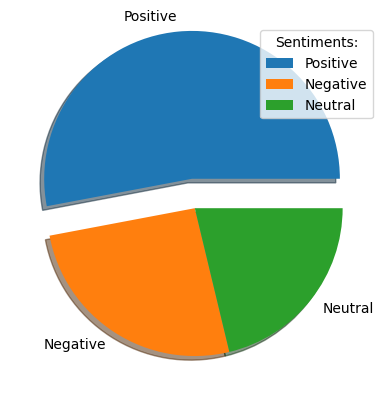

In [17]:
y = np.array([len(positive_list), len(negative_list), len(neutral_list)])
mylabels = ["Positive", "Negative", "Neutral"]
myexplode = [0.2, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.legend(title = "Sentiments:")
plt.show() 